<a href="https://colab.research.google.com/github/bibhu223/MY-CODE/blob/main/Welcome_to_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="markdown-google-sans">
  <h1>Welcome to Colab!</h1>
</div>

<div class="markdown-google-sans">
  <h2>&#40;New&#41; Try the Gemini API</h2>
  <ul>
  <li><a href="https://makersuite.google.com/app/apikey">Generate a Gemini API key</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Talk_to_Gemini_with_Google%27s_Speech_to_Text_API.ipynb?utm_medium=link&utm_campaign=gemini">Talk to Gemini with the Speech-to-Text API</a></li>
  <li><a href="https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/tutorials/quickstart_colab.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API: Quickstart with Python</a></li>
  <li><a href="https://colab.research.google.com/notebooks/snippets/gemini.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API code sample</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Learning_with_Gemini_and_ChatGPT.ipynb?utm_medium=link&utm_campaign=gemini">Compare Gemini with ChatGPT</a></li>  
  <li><a href="https://colab.google/notebooks/?utm_medium=link&utm_campaign=gemini">More notebooks</a></li>
  </ul>
</div>


If you're already familiar with Colab, check out this video to learn about interactive tables, the executed code history view and the command palette.

<center>
  <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y" target="_blank">
  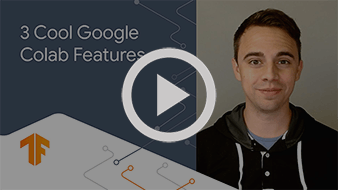
  </a>
</center>

Saving dgist_1.csv to dgist_1 (2).csv


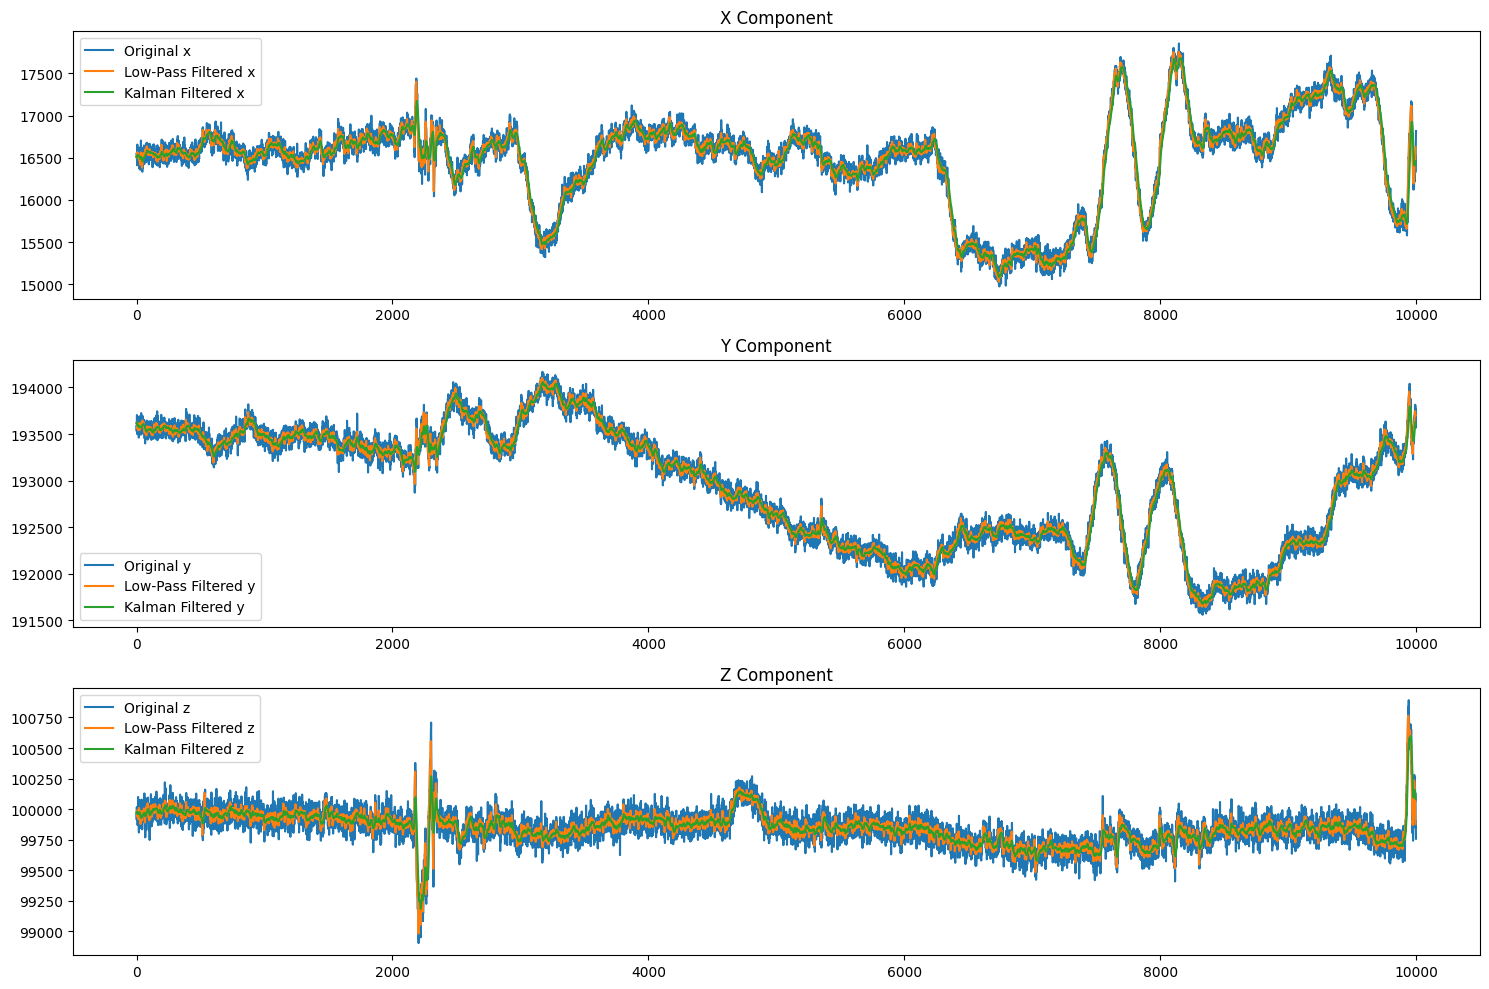

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Upload the CSV file
uploaded = files.upload()

# Assuming the uploaded file is named 'data.csv'
filename = list(uploaded.keys())[0]

# Load the CSV file
df = pd.read_csv(filename)

# Assuming the CSV file has columns 'x', 'y', 'z'
x = df['Raw Z /real X'].values
y = df['Raw X /real Y'].values
z = df['Raw Y /real Z'].values

# Apply a Low-Pass Filter (Moving Average)
def low_pass_filter(data, window_size=5):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

x_lp = low_pass_filter(x)
y_lp = low_pass_filter(y)
z_lp = low_pass_filter(z)

# Kalman Filter implementation
def kalman_filter(data, process_variance=1e-3, measurement_variance=1e-1):
    n_iter = len(data)
    sz = (n_iter,) # size of array
    Q = process_variance # process variance

    # allocate space for arrays
    xhat = np.zeros(sz)      # a posteri estimate of x
    P = np.zeros(sz)         # a posteri error estimate
    xhatminus = np.zeros(sz) # a priori estimate of x
    Pminus = np.zeros(sz)    # a priori error estimate
    K = np.zeros(sz)         # gain or blending factor

    R = measurement_variance # estimate of measurement variance

    # initial guesses
    xhat[0] = data[0]
    P[0] = 1.0

    for k in range(1, n_iter):
        # time update
        xhatminus[k] = xhat[k-1]
        Pminus[k] = P[k-1] + Q

        # measurement update
        K[k] = Pminus[k] / (Pminus[k] + R)
        xhat[k] = xhatminus[k] + K[k] * (data[k] - xhatminus[k])
        P[k] = (1 - K[k]) * Pminus[k]

    return xhat

# Apply the Kalman Filter
x_kf = kalman_filter(x_lp)
y_kf = kalman_filter(y_lp)
z_kf = kalman_filter(z_lp)

# Plot the results
plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
plt.plot(x, label='Original x')
plt.plot(range(len(x_lp)), x_lp, label='Low-Pass Filtered x')
plt.plot(range(len(x_kf)), x_kf, label='Kalman Filtered x')
plt.legend()
plt.title('X Component')

plt.subplot(3, 1, 2)
plt.plot(y, label='Original y')
plt.plot(range(len(y_lp)), y_lp, label='Low-Pass Filtered y')
plt.plot(range(len(y_kf)), y_kf, label='Kalman Filtered y')
plt.legend()
plt.title('Y Component')

plt.subplot(3, 1, 3)
plt.plot(z, label='Original z')
plt.plot(range(len(z_lp)), z_lp, label='Low-Pass Filtered z')
plt.plot(range(len(z_kf)), z_kf, label='Kalman Filtered z')
plt.legend()
plt.title('Z Component')

plt.tight_layout()
plt.show()


Saving dgist_1.csv to dgist_1 (1).csv


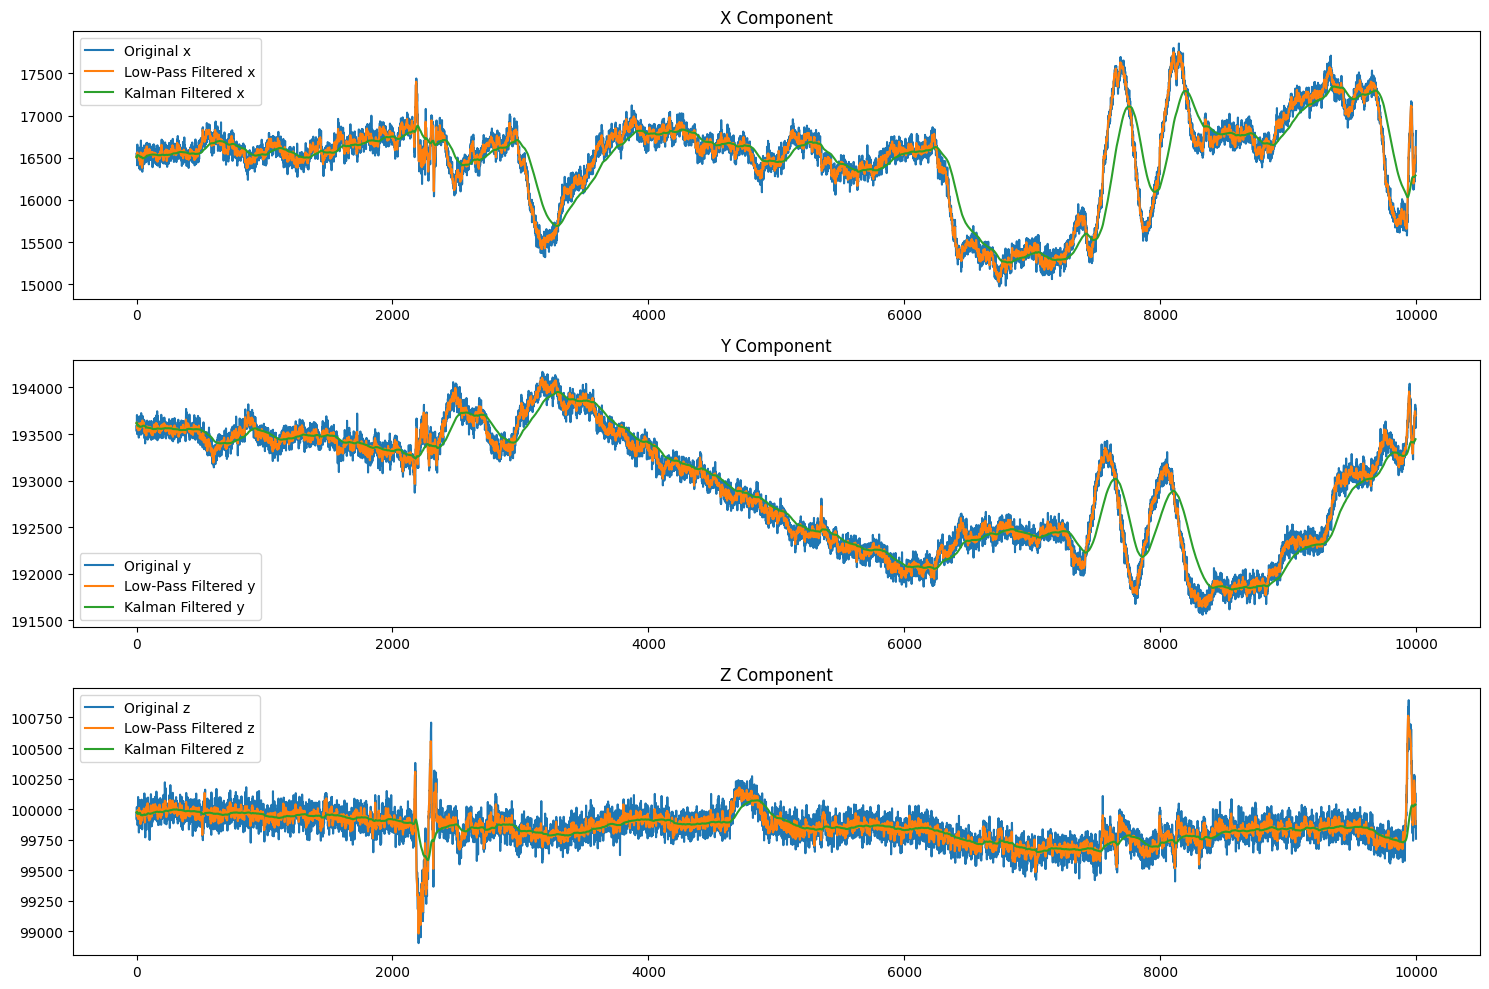

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Upload the CSV file
uploaded = files.upload()

# Assuming the uploaded file is named 'data.csv'
filename = list(uploaded.keys())[0]

# Load the CSV file
df = pd.read_csv(filename)

# Assuming the CSV file has columns 'x', 'y', 'z'
x = df['Raw Z /real X'].values
y = df['Raw X /real Y'].values
z = df['Raw Y /real Z'].values
# Apply a Low-Pass Filter (Moving Average)
def low_pass_filter(data, window_size=5):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

x_lp = low_pass_filter(x)
y_lp = low_pass_filter(y)
z_lp = low_pass_filter(z)

# Kalman Filter implementation
def kalman_filter(data, process_variance=1e-5, measurement_variance=1e-1):
    n_iter = len(data)
    sz = (n_iter,) # size of array
    Q = process_variance # process variance

    # allocate space for arrays
    xhat = np.zeros(sz)      # a posteri estimate of x
    P = np.zeros(sz)         # a posteri error estimate
    xhatminus = np.zeros(sz) # a priori estimate of x
    Pminus = np.zeros(sz)    # a priori error estimate
    K = np.zeros(sz)         # gain or blending factor

    R = measurement_variance # estimate of measurement variance

    # initial guesses
    xhat[0] = data[0]
    P[0] = 1.0

    for k in range(1, n_iter):
        # time update
        xhatminus[k] = xhat[k-1]
        Pminus[k] = P[k-1] + Q

        # measurement update
        K[k] = Pminus[k] / (Pminus[k] + R)
        xhat[k] = xhatminus[k] + K[k] * (data[k] - xhatminus[k])
        P[k] = (1 - K[k]) * Pminus[k]

    return xhat

# Apply the Kalman Filter to the data from the Low-Pass Filter
x_kf = kalman_filter(x_lp)
y_kf = kalman_filter(y_lp)
z_kf = kalman_filter(z_lp)

# Plot the results
plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
plt.plot(x, label='Original x')
plt.plot(range(len(x_lp)), x_lp, label='Low-Pass Filtered x')
plt.plot(range(len(x_kf)), x_kf, label='Kalman Filtered x')
plt.legend()
plt.title('X Component')

plt.subplot(3, 1, 2)
plt.plot(y, label='Original y')
plt.plot(range(len(y_lp)), y_lp, label='Low-Pass Filtered y')
plt.plot(range(len(y_kf)), y_kf, label='Kalman Filtered y')
plt.legend()
plt.title('Y Component')

plt.subplot(3, 1, 3)
plt.plot(z, label='Original z')
plt.plot(range(len(z_lp)), z_lp, label='Low-Pass Filtered z')
plt.plot(range(len(z_kf)), z_kf, label='Kalman Filtered z')
plt.legend()
plt.title('Z Component')

plt.tight_layout()
plt.show()

<div class="markdown-google-sans">
  <h2>What is Colab?</h2>
</div>

Colab, or ‘Colaboratory’, allows you to write and execute Python in your browser, with
- Zero configuration required
- Access to GPUs free of charge
- Easy sharing

Whether you're a <strong>student</strong>, a <strong>data scientist</strong> or an <strong>AI researcher</strong>, Colab can make your work easier. Watch <a href="https://www.youtube.com/watch?v=inN8seMm7UI">Introduction to Colab</a> to find out more, or just get started below!

<div class="markdown-google-sans">

## <strong>Getting started</strong>
</div>

The document that you are reading is not a static web page, but an interactive environment called a <strong>Colab notebook</strong> that lets you write and execute code.

For example, here is a <strong>code cell</strong> with a short Python script that computes a value, stores it in a variable and prints the result:

Saving dgist_1.csv to dgist_1 (4).csv
Epoch 1/10
249/249 [==============================] - 17s 56ms/step - loss: 268249088.0000 - val_loss: 285640832.0000
Epoch 2/10
249/249 [==============================] - 13s 52ms/step - loss: 267774192.0000 - val_loss: 285198592.0000
Epoch 3/10
249/249 [==============================] - 13s 53ms/step - loss: 267352496.0000 - val_loss: 284768000.0000
Epoch 4/10
249/249 [==============================] - 15s 59ms/step - loss: 266938064.0000 - val_loss: 284342240.0000
Epoch 5/10
249/249 [==============================] - 13s 52ms/step - loss: 266526960.0000 - val_loss: 283918784.0000
Epoch 6/10
249/249 [==============================] - 13s 53ms/step - loss: 266117824.0000 - val_loss: 283497216.0000
Epoch 7/10
249/249 [==============================] - 13s 53ms/step - loss: 265710208.0000 - val_loss: 283076832.0000
Epoch 8/10
249/249 [==============================] - 13s 53ms/step - loss: 265303680.0000 - val_loss: 282657440.0000
Epoch 9/10
249/249

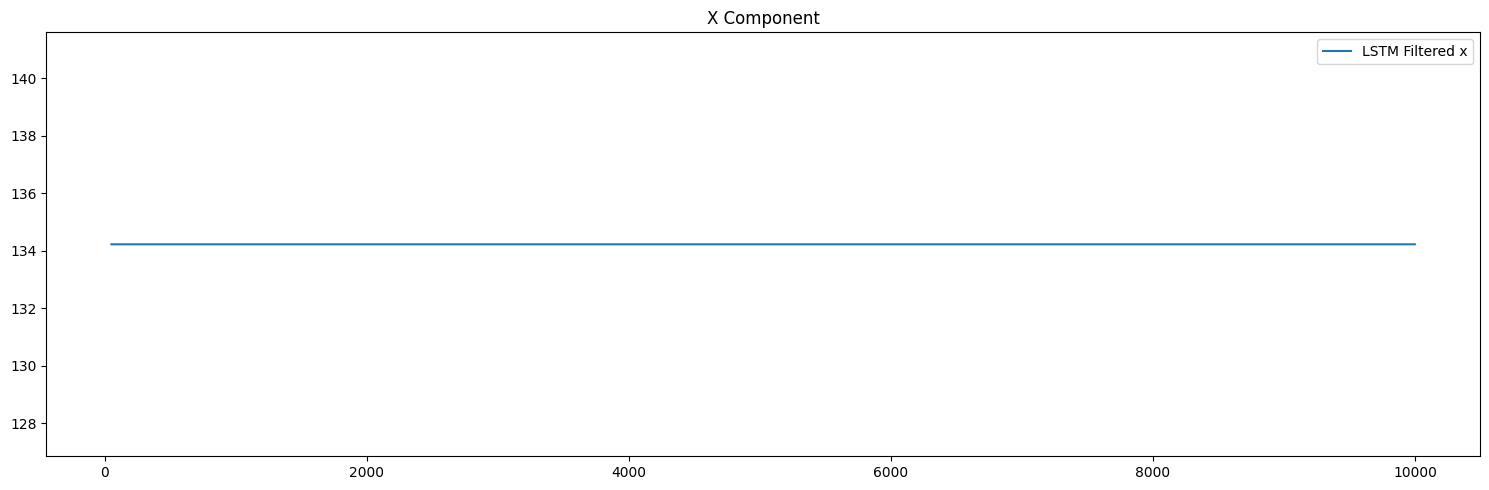

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
# Upload the CSV file
uploaded = files.upload()

# Assuming the uploaded file is named 'data.csv'
filename = list(uploaded.keys())[0]

# Load the CSV file
df = pd.read_csv(filename)

# Assuming the CSV file has columns 'x', 'y', 'z'
x = df['Raw Z /real X'].values
y = df['Raw X /real Y'].values
z = df['Raw Y /real Z'].values
# Prepare the data
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x_seq = data[i:i+seq_length]
        y_seq = data[i+seq_length]
        xs.append(x_seq)
        ys.append(y_seq)
    return np.array(xs), np.array(ys)

seq_length = 50  # Length of the input sequences
x_seq, y_seq = create_sequences(x, seq_length)
y_seq = y_seq.reshape(-1, 1)

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(seq_length, 1)))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(x_seq, y_seq, epochs=10, batch_size=32, validation_split=0.2)

# Use the model to predict and reduce noise
x_pred = model.predict(x_seq)

# Plot the results
plt.figure(figsize=(15, 5))

#plt.plot(range(len(x)), x, label='Original x')
plt.plot(range(seq_length, len(x_pred) + seq_length), x_pred.flatten(), label='LSTM Filtered x')
plt.legend()
plt.title('X Component')

plt.tight_layout()
plt.show()

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut 'Command/Ctrl+Enter'. To edit the code, just click the cell and start editing.

Variables that you define in one cell can later be used in other cells:

Saving dgist_1.csv to dgist_1 (5).csv
Epoch 1/50
249/249 [==============================] - 1s 3ms/step - loss: 0.0221 - val_loss: 0.0132
Epoch 2/50
249/249 [==============================] - 1s 2ms/step - loss: 0.0036 - val_loss: 0.0018
Epoch 3/50
249/249 [==============================] - 1s 3ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 4/50
249/249 [==============================] - 1s 4ms/step - loss: 9.9848e-04 - val_loss: 0.0012
Epoch 5/50
249/249 [==============================] - 1s 4ms/step - loss: 9.6065e-04 - val_loss: 0.0011
Epoch 6/50
249/249 [==============================] - 1s 5ms/step - loss: 9.3697e-04 - val_loss: 0.0011
Epoch 7/50
249/249 [==============================] - 1s 2ms/step - loss: 9.1272e-04 - val_loss: 0.0011
Epoch 8/50
249/249 [==============================] - 1s 3ms/step - loss: 9.0062e-04 - val_loss: 0.0011
Epoch 9/50
249/249 [==============================] - 1s 4ms/step - loss: 8.8740e-04 - val_loss: 0.0011
Epoch 10/50
249/249 [=================

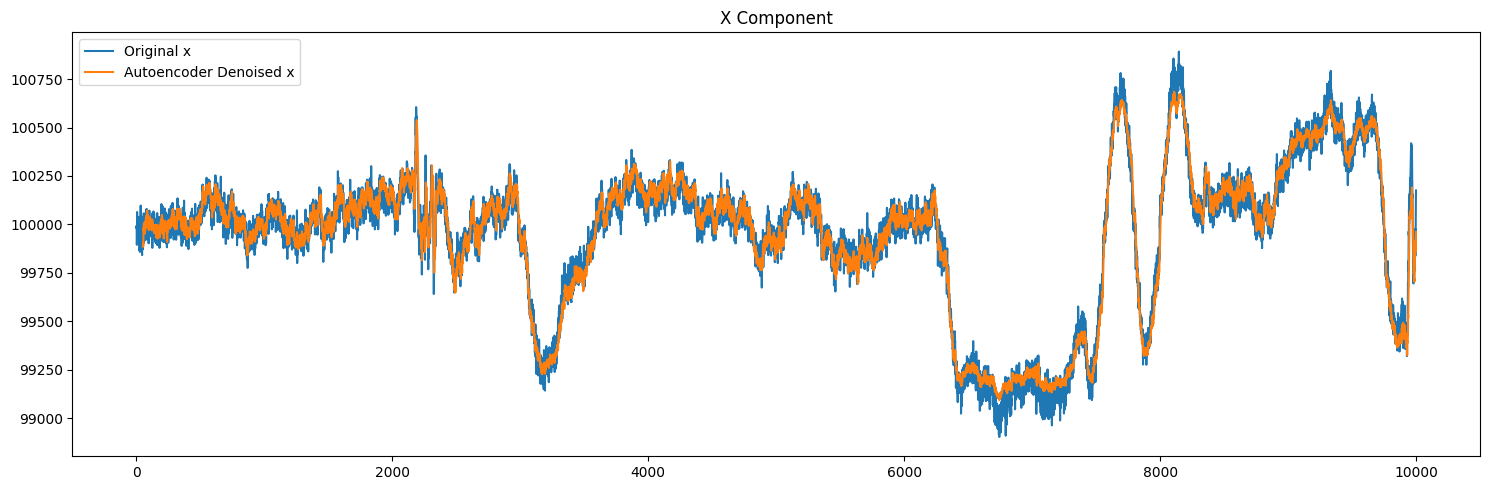

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from sklearn.preprocessing import MinMaxScaler

# Upload the CSV file
uploaded = files.upload()

# Assuming the uploaded file is named 'data.csv'
filename = list(uploaded.keys())[0]

# Load the CSV file
df = pd.read_csv(filename)

# Assuming the CSV file has columns 'x', 'y', 'z'
x = df['Raw Z /real X'].values
y = df['Raw X /real Y'].values
z = df['Raw Y /real Z'].values

# Normalize the data
scaler = MinMaxScaler()
x = scaler.fit_transform(x.reshape(-1, 1))
y = scaler.fit_transform(y.reshape(-1, 1))
z = scaler.fit_transform(z.reshape(-1, 1))

# Prepare the data for the autoencoder
def create_sequences(data, seq_length):
    xs = []
    for i in range(len(data) - seq_length):
        x_seq = data[i:i+seq_length]
        xs.append(x_seq)
    return np.array(xs)

seq_length = 50  # Length of the input sequences
x_seq = create_sequences(x, seq_length)
y_seq = create_sequences(y, seq_length)
z_seq = create_sequences(z, seq_length)

# Define the autoencoder model
input_dim = x_seq.shape[1] * x_seq.shape[2]
encoding_dim = 32  # Dimension of the latent space

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation="relu")(input_layer)
decoder = Dense(input_dim, activation="sigmoid")(encoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mse')

# Flatten the sequences for the autoencoder
x_seq_flattened = x_seq.reshape((x_seq.shape[0], -1))
y_seq_flattened = y_seq.reshape((y_seq.shape[0], -1))
z_seq_flattened = z_seq.reshape((z_seq.shape[0], -1))

# Train the autoencoder
history = autoencoder.fit(x_seq_flattened, x_seq_flattened, epochs=50, batch_size=32, validation_split=0.2)

# Use the model to predict and reduce noise
x_pred = autoencoder.predict(x_seq_flattened)
x_pred = x_pred.reshape((x_pred.shape[0], seq_length, 1))

# Inverse transform to get the original scale
x_denoised = scaler.inverse_transform(x_pred[:, -1, :])

# Plot the results
plt.figure(figsize=(15, 5))

plt.plot(range(len(x)), scaler.inverse_transform(x), label='Original x')
plt.plot(range(seq_length, len(x_denoised) + seq_length), x_denoised.flatten(), label='Autoencoder Denoised x')
plt.legend()
plt.title('X Component')

plt.tight_layout()
plt.show()


Saving dgist_1.csv to dgist_1 (6).csv
Epoch 1/50
249/249 [==============================] - 1s 3ms/step - loss: 0.0235 - val_loss: 0.0126
Epoch 2/50
249/249 [==============================] - 1s 3ms/step - loss: 0.0046 - val_loss: 0.0023
Epoch 3/50
249/249 [==============================] - 1s 2ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 4/50
249/249 [==============================] - 1s 2ms/step - loss: 8.4369e-04 - val_loss: 0.0012
Epoch 5/50
249/249 [==============================] - 1s 3ms/step - loss: 7.2078e-04 - val_loss: 0.0010
Epoch 6/50
249/249 [==============================] - 1s 2ms/step - loss: 6.2480e-04 - val_loss: 9.2539e-04
Epoch 7/50
249/249 [==============================] - 1s 3ms/step - loss: 5.7525e-04 - val_loss: 8.0925e-04
Epoch 8/50
249/249 [==============================] - 1s 2ms/step - loss: 5.4585e-04 - val_loss: 7.6261e-04
Epoch 9/50
249/249 [==============================] - 1s 3ms/step - loss: 5.2999e-04 - val_loss: 7.7312e-04
Epoch 10/50
249/249 [=

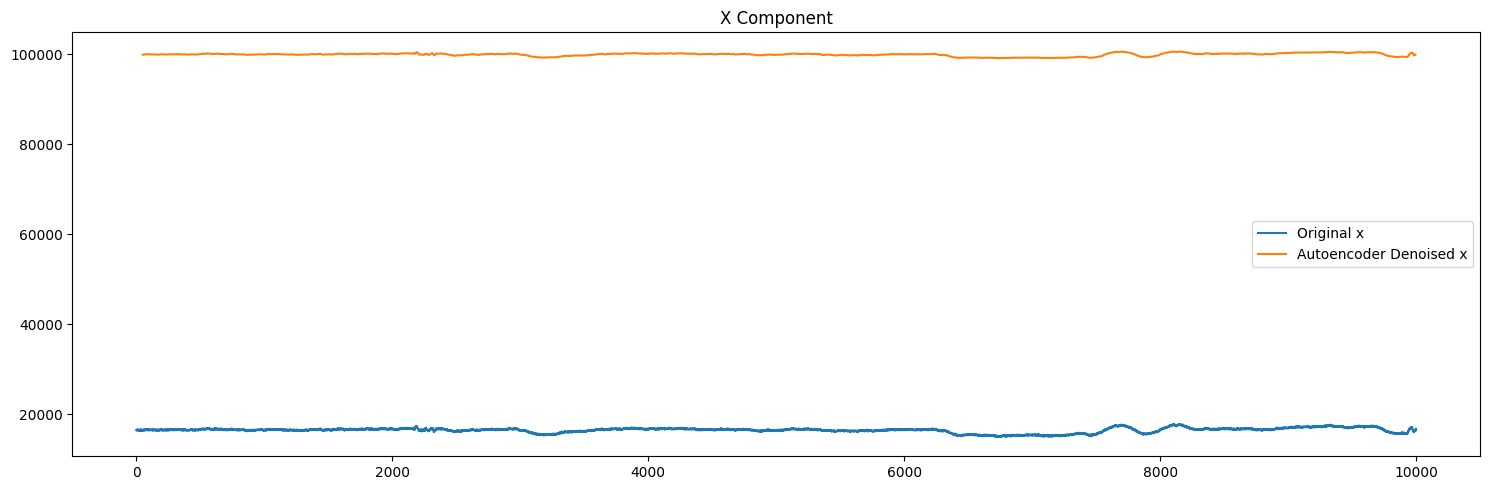

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from sklearn.preprocessing import MinMaxScaler

# Upload the CSV file
uploaded = files.upload()

# Assuming the uploaded file is named 'data.csv'
filename = list(uploaded.keys())[0]

# Load the CSV file
df = pd.read_csv(filename)

# Assuming the CSV file has columns 'x', 'y', 'z'
x = df['Raw Z /real X'].values
y = df['Raw X /real Y'].values
z = df['Raw Y /real Z'].values

# Apply a Low-Pass Filter (Moving Average)
def low_pass_filter(data, window_size=5):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Define window size for the low-pass filter
window_size = 5

# Apply low-pass filter to each component
x_lp = low_pass_filter(x, window_size)
y_lp = low_pass_filter(y, window_size)
z_lp = low_pass_filter(z, window_size)

# Normalize the filtered data
scaler = MinMaxScaler()
x_lp_normalized = scaler.fit_transform(x_lp.reshape(-1, 1))
y_lp_normalized = scaler.fit_transform(y_lp.reshape(-1, 1))
z_lp_normalized = scaler.fit_transform(z_lp.reshape(-1, 1))

# Prepare the data for the autoencoder
seq_length = 50  # Length of the input sequences
x_seq = create_sequences(x_lp_normalized, seq_length)
y_seq = create_sequences(y_lp_normalized, seq_length)
z_seq = create_sequences(z_lp_normalized, seq_length)

# Define the autoencoder model
input_dim = x_seq.shape[1] * x_seq.shape[2]
encoding_dim = 32  # Dimension of the latent space

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation="relu")(input_layer)
decoder = Dense(input_dim, activation="sigmoid")(encoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mse')

# Flatten the sequences for the autoencoder
x_seq_flattened = x_seq.reshape((x_seq.shape[0], -1))
y_seq_flattened = y_seq.reshape((y_seq.shape[0], -1))
z_seq_flattened = z_seq.reshape((z_seq.shape[0], -1))

# Train the autoencoder
history = autoencoder.fit(x_seq_flattened, x_seq_flattened, epochs=50, batch_size=32, validation_split=0.2)

# Use the model to predict and reduce noise
x_pred = autoencoder.predict(x_seq_flattened)
x_pred = x_pred.reshape((x_pred.shape[0], seq_length, 1))

# Inverse transform to get the original scale
x_denoised = scaler.inverse_transform(x_pred[:, -1, :])

# Plot the results
plt.figure(figsize=(15, 5))

plt.plot(range(len(x)), x, label='Original x')
plt.plot(range(seq_length, len(x_denoised) + seq_length), x_denoised.flatten(), label='Autoencoder Denoised x')
#plt.plot(range(window_size//2, len(x_lp) + window_size//2), x_lp, label='Low-Pass Filtered x')
plt.legend()
plt.title('X Component')

plt.tight_layout()
plt.show()




Saving dgist_1.csv to dgist_1 (3).csv


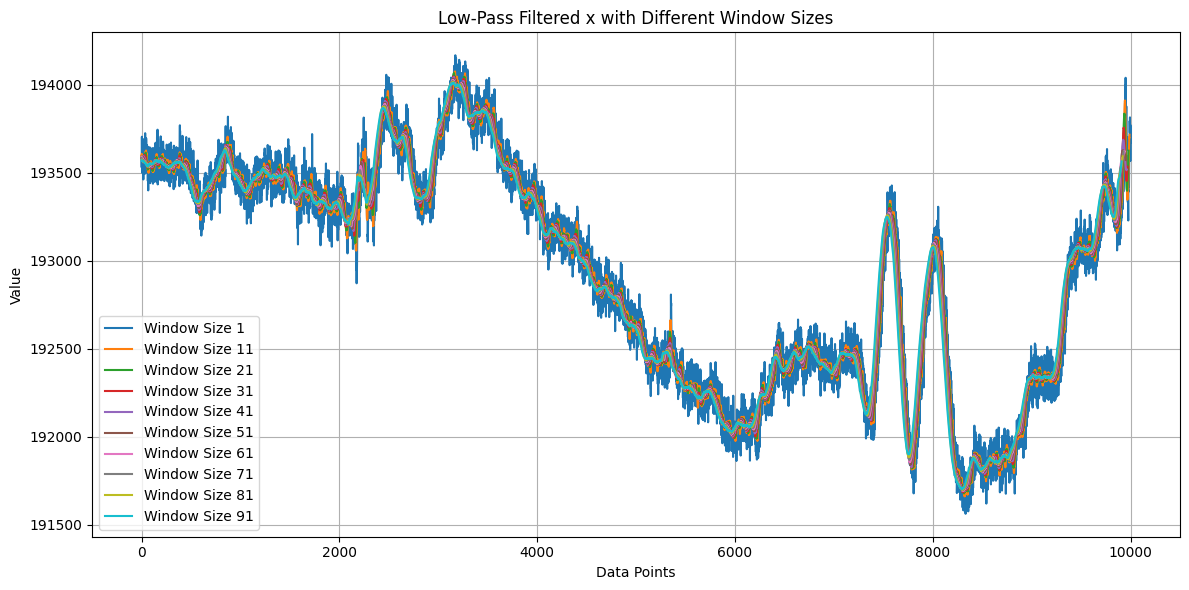

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Upload the CSV file
uploaded = files.upload()

# Assuming the uploaded file is named 'data.csv'
filename = list(uploaded.keys())[0]

# Load the CSV file
df = pd.read_csv(filename)

# Assuming the CSV file has columns 'x', 'y', 'z'
x = df['Raw Z /real X'].values
y = df['Raw X /real Y'].values
z = df['Raw Y /real Z'].values

# Apply a Low-Pass Filter (Moving Average)
def low_pass_filter(data, window_size=5):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Define window sizes to iterate over
window_sizes = np.arange(1, 100, 10)

# Initialize a list to store filtered data and plot labels
filtered_data = []
plot_labels = []

# Apply low-pass filter to each window size
for window_size in window_sizes:
    y_lp = low_pass_filter(y, window_size)
    filtered_data.append(y_lp)
    plot_labels.append(f'Window Size {window_size}')

# Plotting the results
plt.figure(figsize=(12, 6))

# Plotting each filtered data with respective labels
for i in range(len(filtered_data)):
    plt.plot(filtered_data[i], label=plot_labels[i])

#plt.plot(x, label='Original x', linestyle='--', color='k', linewidth=2)
plt.legend()
plt.title('Low-Pass Filtered x with Different Window Sizes')
plt.xlabel('Data Points')
plt.ylabel('Value')
plt.grid(True)
plt.tight_layout()
plt.show()


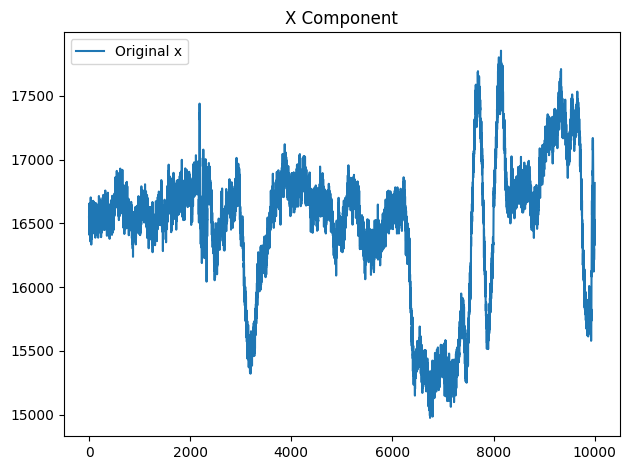

In [39]:
plt.plot(range(len(x)), x, label='Original x')
#plt.plot(range(seq_length, len(x_denoised) + seq_length), x_denoised.flatten(), label='Autoencoder Denoised x')
#plt.plot(range(window_size//2, len(x_lp) + window_size//2), x_lp, label='Low-Pass Filtered x', alpha=0.5)
plt.legend()
plt.title('X Component')

plt.tight_layout()
plt.show()

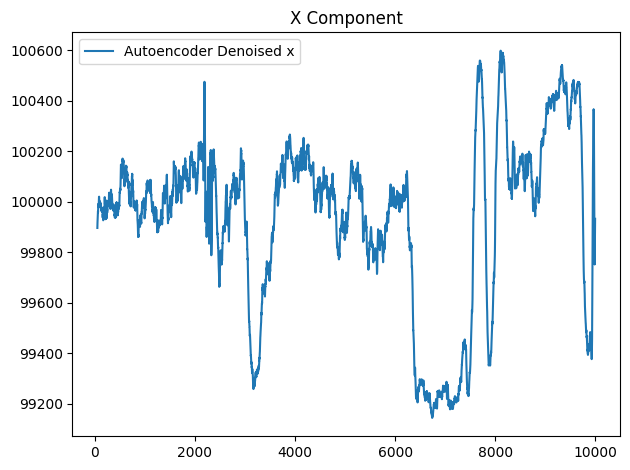

In [40]:
#plt.plot(range(len(x)), x, label='Original x')
plt.plot(range(seq_length, len(x_denoised) + seq_length), x_denoised.flatten(), label='Autoencoder Denoised x')
#plt.plot(range(window_size//2, len(x_lp) + window_size//2), x_lp, label='Low-Pass Filtered x', alpha=0.5)
plt.legend()
plt.title('X Component')

plt.tight_layout()
plt.show()

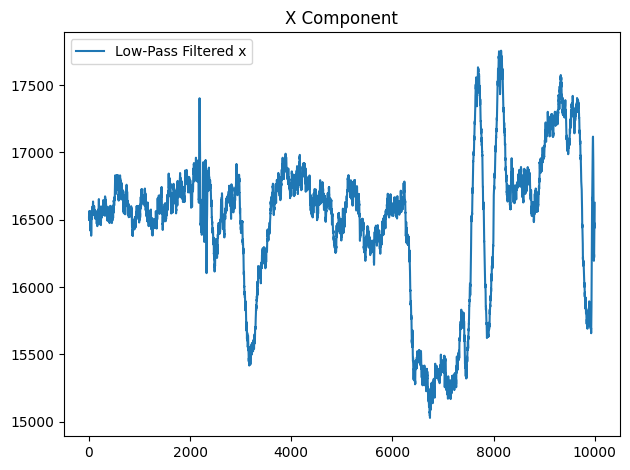

In [42]:
#plt.plot(range(len(x)), x, label='Original x')
#plt.plot(range(seq_length, len(x_denoised) + seq_length), x_denoised.flatten(), label='Autoencoder Denoised x')
plt.plot(range(window_size//2, len(x_lp) + window_size//2), x_lp, label='Low-Pass Filtered x')
plt.legend()
plt.title('X Component')

plt.tight_layout()
plt.show()

Saving dgist_1.csv to dgist_1 (4).csv
x_seq shape: (9950, 50)
y_seq shape: (9950, 50)
z_seq shape: (9950, 50)
Epoch 1/50
249/249 [==============================] - 1s 3ms/step - loss: 0.0208 - val_loss: 0.0093
Epoch 2/50
249/249 [==============================] - 1s 3ms/step - loss: 0.0026 - val_loss: 0.0021
Epoch 3/50
249/249 [==============================] - 1s 3ms/step - loss: 0.0013 - val_loss: 0.0018
Epoch 4/50
249/249 [==============================] - 1s 3ms/step - loss: 0.0012 - val_loss: 0.0015
Epoch 5/50
249/249 [==============================] - 1s 3ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 6/50
249/249 [==============================] - 1s 4ms/step - loss: 9.6547e-04 - val_loss: 0.0012
Epoch 7/50
249/249 [==============================] - 1s 4ms/step - loss: 9.1516e-04 - val_loss: 0.0011
Epoch 8/50
249/249 [==============================] - 1s 4ms/step - loss: 8.9133e-04 - val_loss: 0.0011
Epoch 9/50
249/249 [==============================] - 1s 2ms/step - loss: 8.60

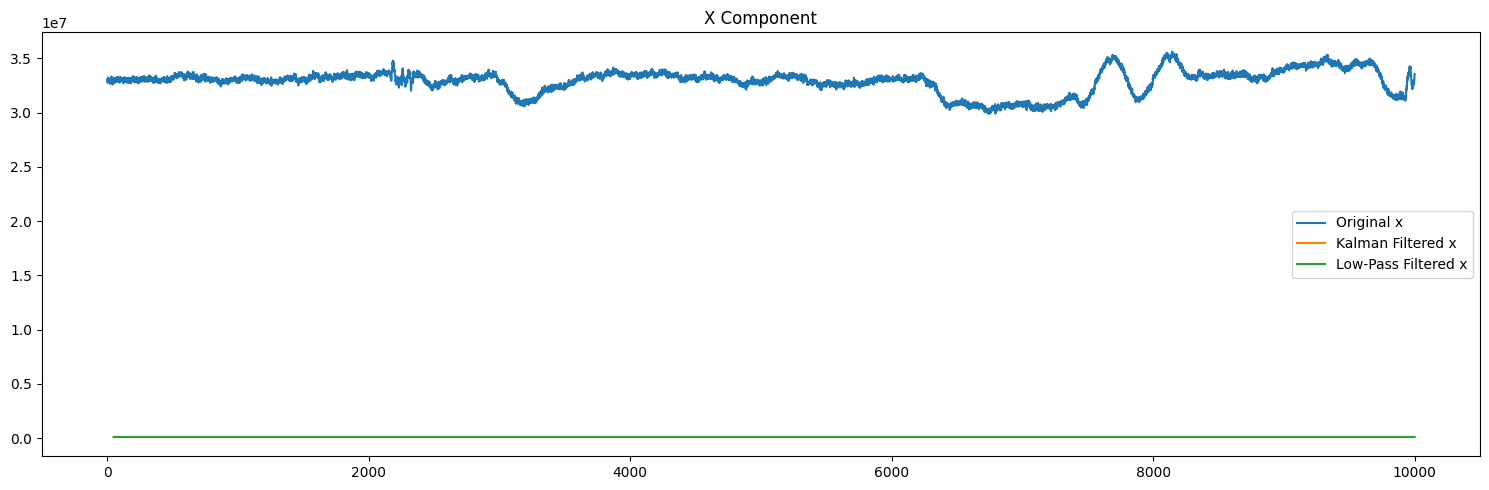

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from sklearn.preprocessing import MinMaxScaler

# Upload the CSV file
uploaded = files.upload()

# Assuming the uploaded file is named 'dgist_1.csv'
filename = list(uploaded.keys())[0]

# Load the CSV file
df = pd.read_csv(filename)

# Assuming the CSV file has columns 'Raw Z /real X', 'Raw X /real Y', 'Raw Y /real Z'
x = df['Raw Z /real X'].values
y = df['Raw X /real Y'].values
z = df['Raw Y /real Z'].values

# Normalize the data
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x.reshape(-1, 1)).flatten()
y_scaled = scaler.fit_transform(y.reshape(-1, 1)).flatten()
z_scaled = scaler.fit_transform(z.reshape(-1, 1)).flatten()

# Prepare the data for the autoencoder
def create_sequences(data, seq_length):
    xs = []
    for i in range(len(data) - seq_length):
        x_seq = data[i:i+seq_length]
        xs.append(x_seq)
    return np.array(xs)

seq_length = 50  # Length of the input sequences
x_seq = create_sequences(x_scaled, seq_length)
y_seq = create_sequences(y_scaled, seq_length)
z_seq = create_sequences(z_scaled, seq_length)

# Debugging: Print shapes to understand structure
print("x_seq shape:", x_seq.shape)
print("y_seq shape:", y_seq.shape)
print("z_seq shape:", z_seq.shape)

# Define the autoencoder model
input_dim = x_seq.shape[1]  # Assuming 1D sequences
encoding_dim = 32  # Dimension of the latent space

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation="relu")(input_layer)
decoder = Dense(input_dim, activation="sigmoid")(encoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mse')

# Flatten the sequences for the autoencoder
x_seq_flattened = x_seq.reshape((x_seq.shape[0], -1))
y_seq_flattened = y_seq.reshape((y_seq.shape[0], -1))
z_seq_flattened = z_seq.reshape((z_seq.shape[0], -1))

# Train the autoencoder
history = autoencoder.fit(x_seq_flattened, x_seq_flattened, epochs=50, batch_size=32, validation_split=0.2)

# Use the model to predict and reduce noise
x_pred = autoencoder.predict(x_seq_flattened)
x_pred = x_pred.reshape((x_pred.shape[0], seq_length, 1))

# Inverse transform to get the original scale
x_denoised = scaler.inverse_transform(x_pred[:, -1, :]).flatten()

# Apply Kalman Filter
def kalman_filter(data, process_variance=1e-5, measurement_variance=1e-1):
    n_iter = len(data)
    sz = (n_iter,) # size of array
    Q = process_variance # process variance

    # allocate space for arrays
    xhat = np.zeros(sz)      # a posteri estimate of x
    P = np.zeros(sz)         # a posteri error estimate
    xhatminus = np.zeros(sz) # a priori estimate of x
    Pminus = np.zeros(sz)    # a priori error estimate
    K = np.zeros(sz)         # gain or blending factor

    R = measurement_variance # estimate of measurement variance

    # initial guesses
    xhat[0] = data[0]
    P[0] = 1.0

    for k in range(1, n_iter):
        # time update
        xhatminus[k] = xhat[k-1]
        Pminus[k] = P[k-1] + Q

        # measurement update
        K[k] = Pminus[k] / (Pminus[k] + R)
        xhat[k] = xhatminus[k] + K[k] * (data[k] - xhatminus[k])
        P[k] = (1 - K[k]) * Pminus[k]

    return xhat

x_kf = kalman_filter(x_denoised)

# Apply Low-Pass Filter (Moving Average)
def low_pass_filter(data, window_size=5):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

x_lp = low_pass_filter(x_kf)

# Plot the results
plt.figure(figsize=(15, 5))

plt.plot(range(len(x)), scaler.inverse_transform(x.reshape(-1, 1)).flatten(), label='Original x')
#plt.plot(range(seq_length, seq_length+len(x_denoised)), x_denoised, label='Autoencoder Denoised x')
plt.plot(range(seq_length, seq_length+len(x_kf)), x_kf, label='Kalman Filtered x')
plt.plot(range(seq_length+2, seq_length+len(x_lp)+2), x_lp, label='Low-Pass Filtered x')
plt.legend()
plt.title('X Component')

plt.tight_layout()
plt.show()


Saving dgist_1.csv to dgist_1.csv
Epoch 1/100
498/498 [==============================] - 3s 4ms/step - loss: 0.0024 - val_loss: 0.0017
Epoch 2/100
498/498 [==============================] - 1s 3ms/step - loss: 9.2535e-04 - val_loss: 0.0014
Epoch 3/100
498/498 [==============================] - 1s 3ms/step - loss: 7.6911e-04 - val_loss: 0.0013
Epoch 4/100
498/498 [==============================] - 1s 3ms/step - loss: 7.9868e-04 - val_loss: 9.6496e-04
Epoch 5/100
498/498 [==============================] - 1s 3ms/step - loss: 7.0408e-04 - val_loss: 7.9409e-04
Epoch 6/100
498/498 [==============================] - 1s 3ms/step - loss: 6.6357e-04 - val_loss: 7.9199e-04
Epoch 7/100
498/498 [==============================] - 1s 3ms/step - loss: 7.3719e-04 - val_loss: 0.0010
Epoch 8/100
498/498 [==============================] - 2s 3ms/step - loss: 6.7641e-04 - val_loss: 9.9745e-04
Epoch 9/100
498/498 [==============================] - 2s 4ms/step - loss: 6.4324e-04 - val_loss: 7.2540e-04
Epoch

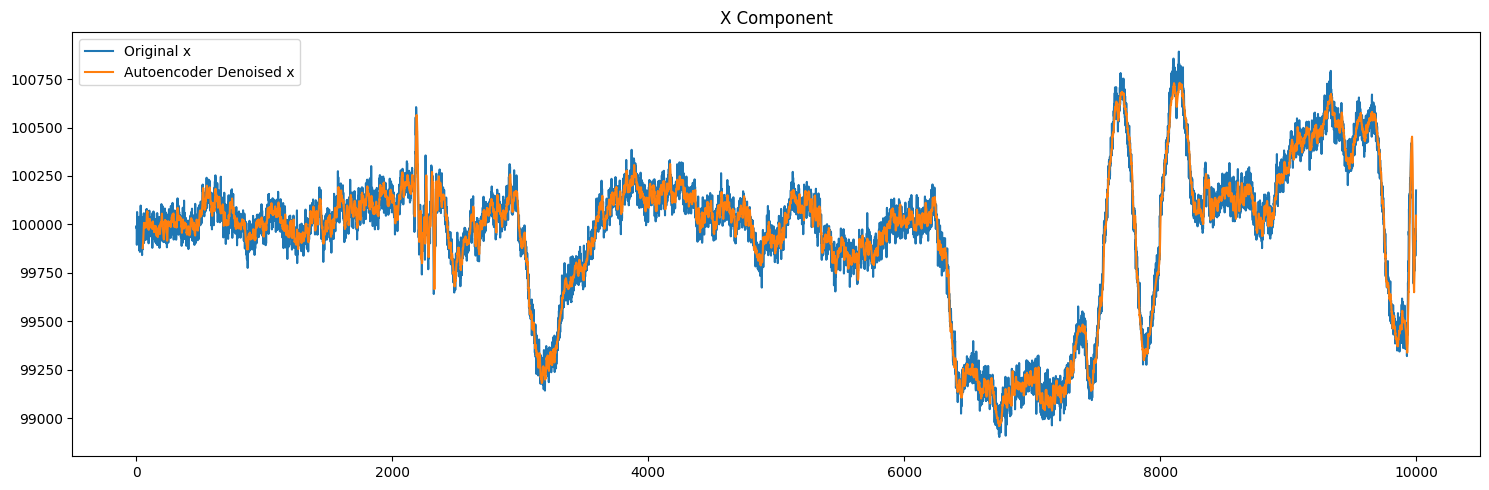

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from sklearn.preprocessing import MinMaxScaler

# Upload the CSV file
uploaded = files.upload()

# Assuming the uploaded file is named 'data.csv'
filename = list(uploaded.keys())[0]

# Load the CSV file
df = pd.read_csv(filename)

# Assuming the CSV file has columns 'x', 'y', 'z'
x = df['Raw Z /real X'].values
y = df['Raw X /real Y'].values
z = df['Raw Y /real Z'].values

# Normalize the data
scaler = MinMaxScaler()
x = scaler.fit_transform(x.reshape(-1, 1))
y = scaler.fit_transform(y.reshape(-1, 1))
z = scaler.fit_transform(z.reshape(-1, 1))

# Prepare the data for the autoencoder
def create_sequences(data, seq_length):
    xs = []
    for i in range(len(data) - seq_length):
        x_seq = data[i:i+seq_length]
        xs.append(x_seq)
    return np.array(xs)

seq_length = 50  # Length of the input sequences
x_seq = create_sequences(x, seq_length)
y_seq = create_sequences(y, seq_length)
z_seq = create_sequences(z, seq_length)

# Flatten the sequences for the autoencoder
x_seq_flattened = x_seq.reshape((x_seq.shape[0], -1))
y_seq_flattened = y_seq.reshape((y_seq.shape[0], -1))
z_seq_flattened = z_seq.reshape((z_seq.shape[0], -1))

# Define the autoencoder model
input_dim = x_seq_flattened.shape[1]  # Adjusted to the flattened input dimension
encoding_dim = 64  # Increased dimension of the latent space
hidden_dim_1 = 128  # Added hidden layer with more neurons

input_layer = Input(shape=(input_dim,))
encoder = Dense(hidden_dim_1, activation="relu")(input_layer)
encoder = Dense(encoding_dim, activation="relu")(encoder)
decoder = Dense(hidden_dim_1, activation="relu")(encoder)
decoder = Dense(input_dim, activation="sigmoid")(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mse')

# Train the autoencoder
history = autoencoder.fit(x_seq_flattened, x_seq_flattened, epochs=100, batch_size=16, validation_split=0.2)

# Use the model to predict and reduce noise
x_pred = autoencoder.predict(x_seq_flattened)
x_pred = x_pred.reshape((x_pred.shape[0], seq_length, 1))

# Inverse transform to get the original scale
x_denoised = scaler.inverse_transform(x_pred[:, -1, :])

# Plot the results
plt.figure(figsize=(15, 5))

plt.plot(range(len(x)), scaler.inverse_transform(x), label='Original x')
plt.plot(range(seq_length, len(x_denoised) + seq_length), x_denoised.flatten(), label='Autoencoder Denoised x')
plt.legend()
plt.title('X Component')

plt.tight_layout()
plt.show()


Saving dgist_1.csv to dgist_1 (3).csv


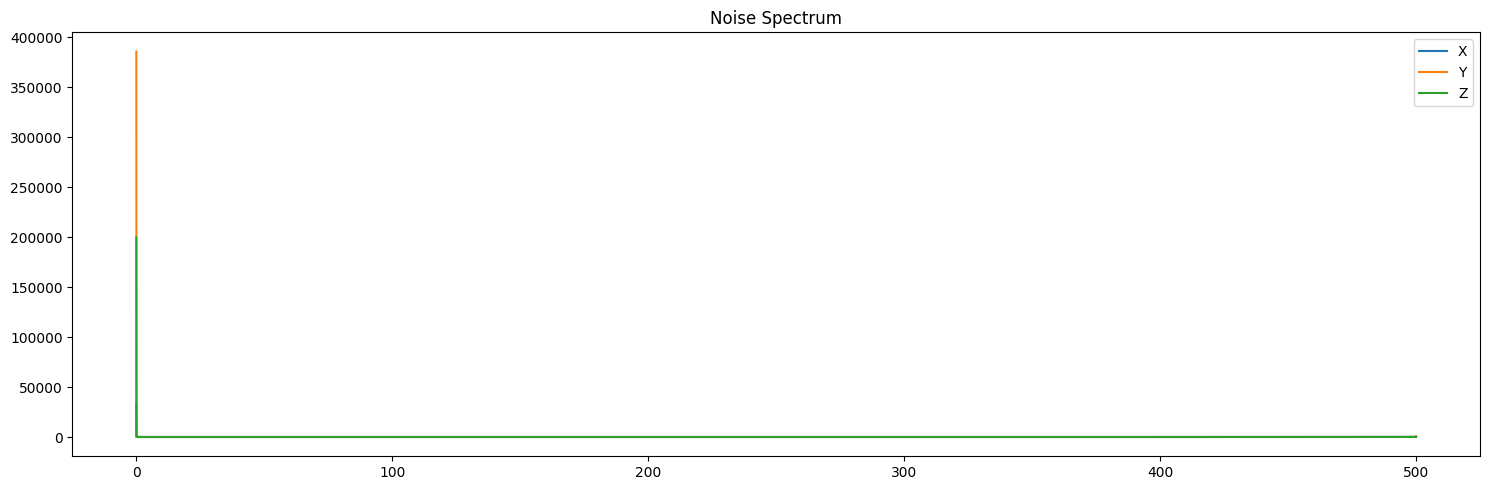

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from sklearn.preprocessing import MinMaxScaler

# Upload the CSV file
uploaded = files.upload()

# Assuming the uploaded file is named 'data.csv'
filename = list(uploaded.keys())[0]

# Load the CSV file
df = pd.read_csv(filename)

# Assuming the CSV file has columns 'x', 'y', 'z'
x = df['Raw Z /real X'].values
y = df['Raw X /real Y'].values
z = df['Raw Y /real Z'].values
import numpy as np
import matplotlib.pyplot as plt

# Calculate the FFT of the signals
fft_x = np.fft.fft(x)
fft_y = np.fft.fft(y)
fft_z = np.fft.fft(z)

# Calculate the frequency domain
N = len(x)
xf = np.linspace(0.0, 1.0/(2.0*1/1000.0), N)

# Plot the noise spectrum
plt.figure(figsize=(15, 5))

plt.plot(xf, 2.0/N * np.abs(fft_x), label='X')
plt.plot(xf, 2.0/N * np.abs(fft_y), label='Y')
plt.plot(xf, 2.0/N * np.abs(fft_z), label='Z')
plt.legend()
plt.title('Noise Spectrum')

plt.tight_layout()
plt.show()

Saving dgist_1.csv to dgist_1 (4).csv


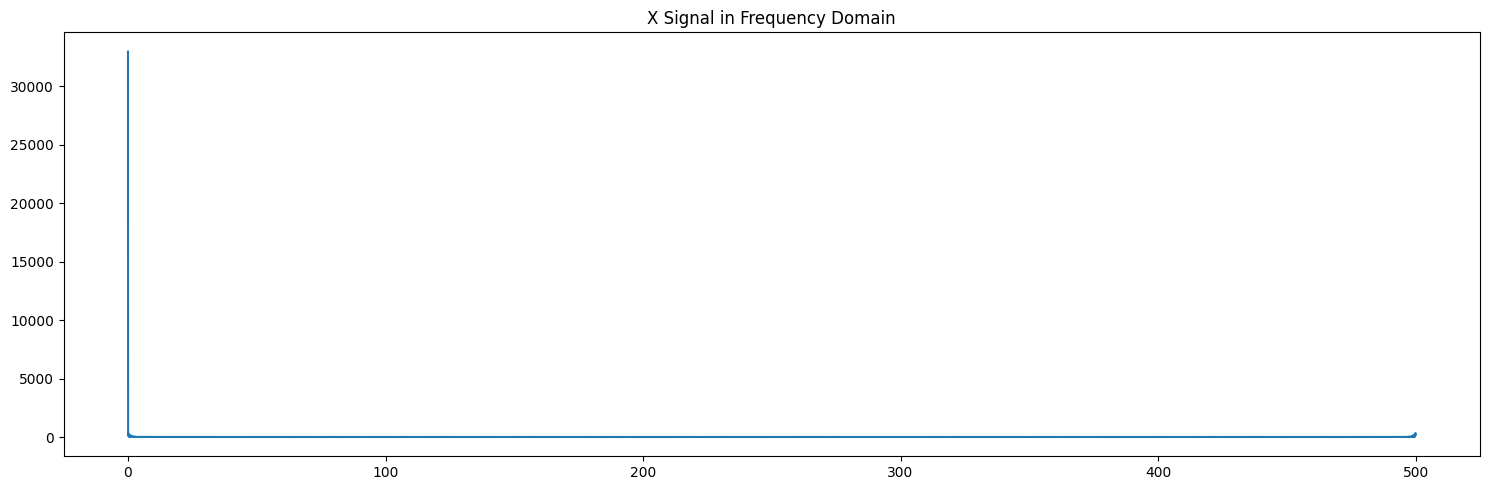

In [16]:
# prompt: just convert the x use fft and plot with frequency

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Upload the CSV file
uploaded = files.upload()

# Assuming the uploaded file is named 'data.csv'
filename = list(uploaded.keys())[0]

# Load the CSV file
df = pd.read_csv(filename)

# Assuming the CSV file has columns 'x', 'y', 'z'
x = df['Raw Z /real X'].values

# Calculate the FFT of the signal
fft_x = np.fft.fft(x)

# Calculate the frequency domain
N = len(x)
xf = np.linspace(0.0, 1.0/(2.0*1/1000.0), N)

# Plot the x signal in the frequency domain
plt.figure(figsize=(15, 5))

plt.plot(xf, 2.0/N * np.abs(fft_x))
plt.title('X Signal in Frequency Domain')

plt.tight_layout()
plt.show()


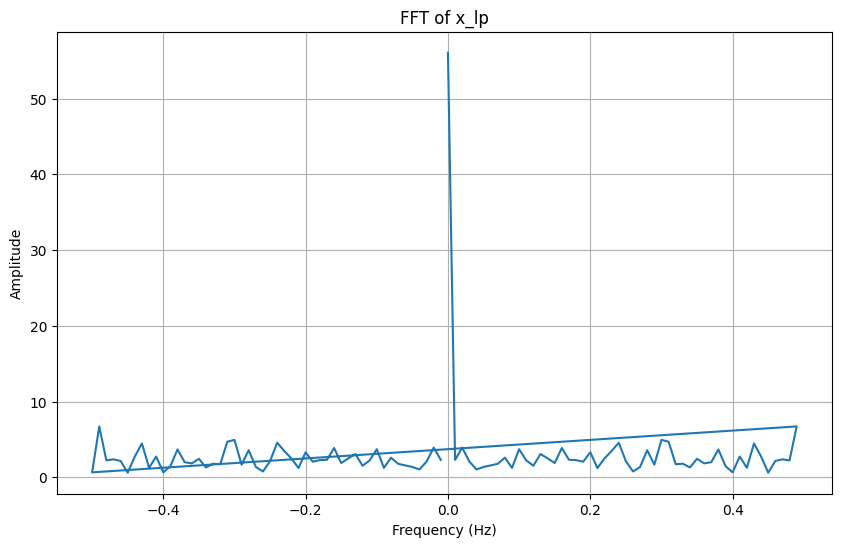

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming x_lp is your data array with time interval of 1 ms
# Example data (replace with your actual data)
# x_lp = np.random.rand(100)  # Example data

# Assuming x_lp is your actual data with time in ms
# Generate time axis
time_ms = np.arange(len(x))  # Time in milliseconds

# Perform FFT
fft_x = np.fft.fft(x)
freq = np.fft.fftfreq(len(x), d=1)  # Frequency axis in Hz

# Plotting the FFT result
plt.figure(figsize=(10, 6))
plt.plot(freq, np.abs(fft_x))
plt.title('FFT of x_lp')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


Colab notebooks allow you to combine <strong>executable code</strong> and <strong>rich text</strong> in a single document, along with <strong>images</strong>, <strong>HTML</strong>, <strong>LaTeX</strong> and more. When you create your own Colab notebooks, they are stored in your Google Drive account. You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or even edit them. To find out more, see <a href="/notebooks/basic_features_overview.ipynb">Overview of Colab</a>. To create a new Colab notebook you can use the File menu above, or use the following link: <a href="http://colab.research.google.com#create=true">Create a new Colab notebook</a>.

Colab notebooks are Jupyter notebooks that are hosted by Colab. To find out more about the Jupyter project, see <a href="https://www.jupyter.org">jupyter.org</a>.

<div class="markdown-google-sans">

## Data science
</div>

With Colab you can harness the full power of popular Python libraries to analyse and visualise data. The code cell below uses <strong>numpy</strong> to generate some random data, and uses <strong>matplotlib</strong> to visualise it. To edit the code, just click the cell and start editing.

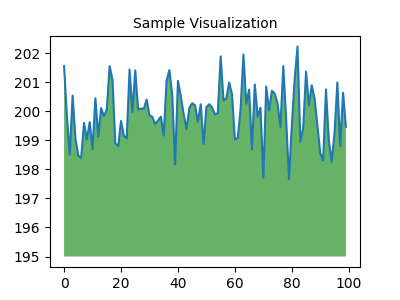

In [ ]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from GitHub and many other sources. To find out more about importing data, and how Colab can be used for data science, see the links below under <a href="#working-with-data">Working with data</a>.

<div class="markdown-google-sans">

## Machine learning
</div>

With Colab you can import an image dataset, train an image classifier on it, and evaluate the model, all in just <a href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb">a few lines of code</a>. Colab notebooks execute code on Google's cloud servers, meaning you can leverage the power of Google hardware, including <a href="#using-accelerated-hardware">GPUs and TPUs</a>, regardless of the power of your machine. All you need is a browser.

Colab is used extensively in the machine learning community with applications including:
- Getting started with TensorFlow
- Developing and training neural networks
- Experimenting with TPUs
- Disseminating AI research
- Creating tutorials

To see sample Colab notebooks that demonstrate machine learning applications, see the <a href="#machine-learning-examples">machine learning examples</a> below.

<div class="markdown-google-sans">

## More resources

### Working with notebooks in Colab

</div>

- [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Guide to markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Working with data
</div>

- [Loading data: Drive, Sheets and Google Cloud Storage](/notebooks/io.ipynb)
- [Charts: visualising data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Machine learning crash course

<div>

These are a few of the notebooks from Google's online machine learning course. See the <a href="https://developers.google.com/machine-learning/crash-course/">full course website</a> for more.
- [Intro to Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Linear regression with tf.keras using synthetic data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Using accelerated hardware
</div>

- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Featured examples

</div>

- <a href="https://colab.research.google.com/github/NVIDIA/NeMo/blob/stable/tutorials/VoiceSwapSample.ipynb">NeMo voice swap</a>: Use Nvidia NeMo conversational AI toolkit to swap a voice in an audio fragment with a computer-generated one.

- <a href="https://tensorflow.org/hub/tutorials/tf2_image_retraining">Retraining an Image Classifier</a>: Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- <a href="https://tensorflow.org/hub/tutorials/tf2_text_classification">Text Classification</a>: Classify IMDB film reviews as either <em>positive</em> or <em>negative</em>.
- <a href="https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization">Style Transfer</a>: Use deep learning to transfer style between images.
- <a href="https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa">Multilingual Universal Sentence Encoder Q&amp;A</a>: Use a machine-learning model to answer questions from the SQuAD dataset.
- <a href="https://tensorflow.org/hub/tutorials/tweening_conv3d">Video Interpolation</a>: Predict what happened in a video between the first and the last frame.
